# Get Started using Qiskit

Let's check if qiskit works and implement some very simple stuff. As a reference, we used the IBM Quantum Learning Platform and in particular the introductory course on ``Basics of quantum information``

In [1]:
from qiskit import __version__
 
print(__version__)

2.2.1


## Single Systems

### Some basics

Without `Qiskit` we would have to work with python vectors, probably with numpy. This can be done by defining ket vectors as

In [2]:
import numpy as np
 
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])
 
print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


We can also define matrices as

In [3]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


and multiply matrices and vectors, or matrices by matrices with

In [5]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


This might already be sufficient for basic quantum computing tasks. Nevertheless, qiskit is already nice for visualising the results in a cool way. For example, we can use

In [6]:
from qiskit.visualization import array_to_latex
 
display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

to get a nice output of our results. Now, let's have a look at quantum computing specific classes. One of them is the `Statevector` class. 

In [7]:
from qiskit.quantum_info import Statevector
from numpy import sqrt
 
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

We can visualise statevectors in different ways by

In [8]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


and we can check if it's a valid statevector or not (normalised)

In [9]:
display(u.is_valid())
display(w.is_valid())

True

False

### Simulating

Let's look at the previously defined vector

In [10]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

and measure it

In [11]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

We can repeat this measurement many times by running

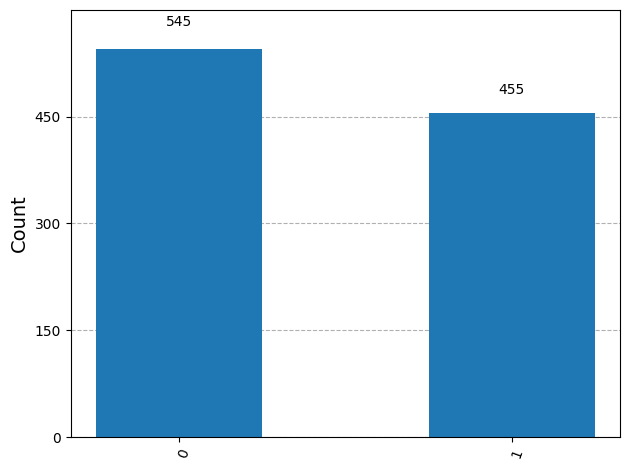

In [12]:
from qiskit.visualization import plot_histogram
 
statistics = v.sample_counts(1000)
plot_histogram(statistics)

### Using operators

We can also define our own operators with

In [13]:
from qiskit.quantum_info import Operator
 
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])
 
display(T.draw("latex"))

<IPython.core.display.Latex object>

Let's evolve `v` by applying an operator to it

In [14]:
v = Statevector([1, 0])
 
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
 
display(v.draw("latex"))

<IPython.core.display.Latex object>

### Quantum Circuit, first steps

with a single qubit, our circuit is basically one line. Nevertheless, here is how it looks like

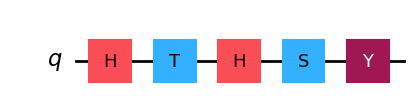

In [15]:
from qiskit import QuantumCircuit
 
circuit = QuantumCircuit(1)
 
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
 
display(circuit.draw(output="mpl"))

In [16]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

We can also evolve a statevector with that circuit by running

In [17]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

and simulate an experiment by

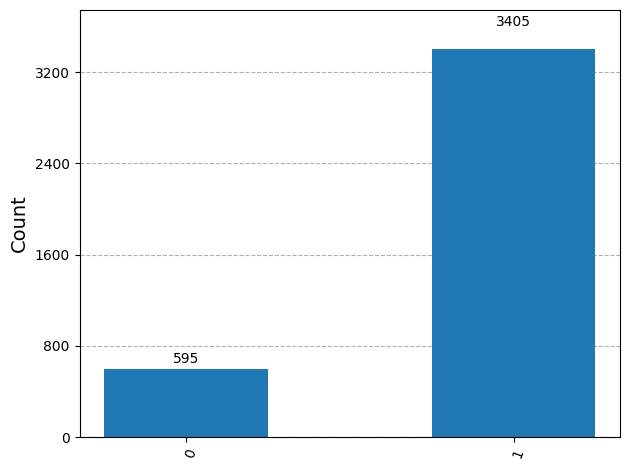

In [18]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))

## Multiple Systems

For multiple systems, everything gets a bit more interesting. First of all, we can prepare states that are tensor products of single qubits as for example

In [19]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)
display(psi.draw("latex"))

<IPython.core.display.Latex object>

or

In [20]:
plus = Statevector.from_label("+")
minus_i = Statevector.from_label("l")
phi = plus.tensor(minus_i)
display(phi.draw("latex"))

<IPython.core.display.Latex object>

which can also be written as

In [21]:
display((plus ^ minus_i).draw("latex"))

<IPython.core.display.Latex object>

Tensor products of matrices can be written as

In [22]:
H = Operator.from_label("H")
Id = Operator.from_label("I")
X = Operator.from_label("X")
display(H.tensor(Id).draw("latex"))
display(H.tensor(Id).tensor(X).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

or, again, as

In [23]:
display((H ^ Id ^ X).draw("latex"))

<IPython.core.display.Latex object>

Evolving a state is done with

In [24]:
display(phi.evolve(H ^ Id).draw("latex"))

<IPython.core.display.Latex object>

In [25]:
CX = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
psi = plus.tensor(zero)
display(psi.evolve(CX).draw("latex"))

<IPython.core.display.Latex object>

### Partial measurement

For a system containing several qubits, we can perform a measurement on a subsystem which leaves the rest in a new, normalised state 

In [26]:
w = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
display(w.draw("latex"))
 
result, state = w.measure([0])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))
 
result, state = w.measure([0, 1])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 1
State after measurement:


<IPython.core.display.Latex object>

Measured: 10
State after measurement:


<IPython.core.display.Latex object>